In [1]:
#Extra Tables for Future Reference of Owners 
    #Calculates number of males and females
    #Demographic of Customer (Generation)
    #Number of Transactions (Orders) per Month



In [2]:
#Sex
#Load JSON file

#printing ranges (NumPy)

import numpy as np
import pandas as pd
import datetime
import matplotlib as plt

filename = "transaction-data-adhoc-analysis.json"

df = pd.read_json(filename)

print(df)
df.head
df.drop(labels=["address","birthdate","mail","transaction_items", "transaction_date", "username","transaction_value"], axis=1)

                                                 address   birthdate  \
0                              USNS Wagner\nFPO AE 00917  1926/03/11   
1                             USCGC Benson\nFPO AP 48794  2016/07/08   
2                             USCGC Benson\nFPO AP 48794  2016/07/08   
3                             USCGC Benson\nFPO AP 48794  2016/07/08   
4               33911 Hansen Loaf\nWest Sandra, ND 54188  1949/09/27   
...                                                  ...         ...   
83031      96081 Harrison Brooks\nJenniferbury, MA 02124  2019/10/26   
83032  428 Kristopher Curve Apt. 206\nMcculloughville...  1913/11/04   
83033  428 Kristopher Curve Apt. 206\nMcculloughville...  1913/11/04   
83034  428 Kristopher Curve Apt. 206\nMcculloughville...  1913/11/04   
83035                   PSC 1089, Box 3720\nAPO AE 08973  2012/04/30   

                            mail               name sex       username  \
0         watsonbrenda@gmail.com  Jennifer Campbell   F  vero

,name,sex
0,Jennifer Campbell,F
1,Melissa Kim,F
2,Melissa Kim,F
3,Melissa Kim,F
4,Kristen Cooper,F
...,...,...
83031,Tammy Byrd,F
83032,Donald Andersen,M
83033,Donald Andersen,M
83034,Donald Andersen,M


In [3]:
#Make New Dataframe only with name and sex
new_df=df[["name","sex"]].copy()
new_df["Male"]=df["sex"].str.contains("M")
new_df["Female"]=df["sex"].str.contains("F")
new_df

,name,sex,Male,Female
0,Jennifer Campbell,F,False,True
1,Melissa Kim,F,False,True
2,Melissa Kim,F,False,True
3,Melissa Kim,F,False,True
4,Kristen Cooper,F,False,True
...,...,...,...,...
83031,Tammy Byrd,F,False,True
83032,Donald Andersen,M,True,False
83033,Donald Andersen,M,True,False
83034,Donald Andersen,M,True,False


In [4]:
#Sum of Males 
count_males=new_df["Male"].sum()
count_males

41863

In [5]:
#Sum of Females 
count_females=new_df["Female"].sum()
count_females

41173

In [6]:
#Make Dataframe with number of males and females
Sex_of_Customers= {'Sex of Customers': ['Count'], 'Male': [count_males],"Female":[count_females]}
Sex_df = pd.DataFrame(Sex_of_Customers).set_index('Sex of Customers')

In [7]:
#Show Result
Sex_df

,Male,Female
Sex of Customers,,
Count,41863,41173


In [8]:
#Make New Dataframe only with name and birthdate
new_2_df=df[["name","birthdate"]].copy()
new_2_df['Year'] = pd.DatetimeIndex(df['birthdate']).year
new_2_df["Year"].unique()

array([1926, 2016, 1949, 2012, 1982, 1956, 1993, 1930, 1916, 2004, 1919,
       1939, 1931, 1934, 2011, 1933, 1955, 1996, 1967, 2018, 1944, 1917,
       2008, 1920, 1922, 2002, 1936, 1942, 1966, 1948, 1994, 1918, 1991,
       1968, 1997, 1950, 1970, 1914, 1921, 1924, 1984, 1979, 1964, 1959,
       1974, 2019, 1985, 1972, 1965, 2015, 2006, 1928, 1988, 1969, 1992,
       1932, 1998, 2013, 2021, 2010, 1987, 1923, 1971, 1946, 1973, 1912,
       1980, 1927, 1983, 1952, 1963, 1937, 1909, 1941, 1977, 1958, 2014,
       1976, 1961, 1929, 1908, 1960, 2001, 1906, 1954, 2003, 1999, 1935,
       1913, 2000, 2007, 1925, 1953, 1910, 1995, 1945, 1911, 1986, 2017,
       1938, 1957, 1978, 1981, 1975, 2020, 1915, 1989, 2005, 1947, 1962,
       1907, 2009, 1951, 1990, 1943, 1940, 2022])

In [9]:
#Check if they belong to the 1900

def date (x):
    if x>=1901 and x<=1927:
        return str("Interbellum")
    elif x>=1928 and x<=1945:
        return str("Boomer")
    elif x>=1946 and x<=1964:
        return str("X-Gen")
    elif x>=1965 and x<=1980:
        return str("Xennials")
    elif x>=1981 and x<=1996:
        return str("Millenials")
    elif x>=1997 and x<=2012:
        return str("Z")
    elif x>=2013 and x<=2025:
        return str("Alpha")
    
new_2_df["Generation"]=new_2_df["Year"].apply(date)
new_2_df

,name,birthdate,Year,Generation
0,Jennifer Campbell,1926/03/11,1926,Interbellum
1,Melissa Kim,2016/07/08,2016,Alpha
2,Melissa Kim,2016/07/08,2016,Alpha
3,Melissa Kim,2016/07/08,2016,Alpha
4,Kristen Cooper,1949/09/27,1949,X-Gen
...,...,...,...,...
83031,Tammy Byrd,2019/10/26,2019,Alpha
83032,Donald Andersen,1913/11/04,1913,Interbellum
83033,Donald Andersen,1913/11/04,1913,Interbellum
83034,Donald Andersen,1913/11/04,1913,Interbellum


In [10]:
#Check number of customers per generation
Interbellum_Generation=new_2_df["Generation"].str.contains("Interbellum").sum()
Boomer_Generation=new_2_df["Generation"].str.contains("Boomer").sum()
Generation_X=new_2_df["Generation"].str.contains("X-Gen").sum()
Xennials=new_2_df["Generation"].str.contains("Xennials").sum()
Millenials=new_2_df["Generation"].str.contains("Millenials").sum()
Generation_Z=new_2_df["Generation"].str.contains("Z").sum()
Generation_Alpha=new_2_df["Generation"].str.contains("Alpha").sum()

In [11]:
#Make Dataframe with number of males and females
Generation= {'Generation': ['Count'], 'Interbellum Generation':[Interbellum_Generation],'Boomer Generation':[Boomer_Generation],'Generation X': [Generation_X],'Xennials': [Xennials],'Millenials': [Millenials],'Generation Z': [Generation_Z],'Generation Alpha': [Generation_Alpha]}
Generation_df = pd.DataFrame(Generation).set_index('Generation')

In [12]:
#Show Result
Generation_df

,Interbellum Generation,Boomer Generation,Generation X,Xennials,Millenials,Generation Z,Generation Alpha
Generation,,,,,,,
Count,16175,12922,13142,11260,11062,11684,6791


In [13]:
#Make New Dataframe only with Number of Transactions per Month
new_df_3=df[["transaction_date"]].copy()
new_df_3
new_df_3["Tentative_Date"] = pd.to_datetime(df['transaction_date'])
new_df_3["month"]=pd.DatetimeIndex(df["transaction_date"]).month
new_df_4=new_df_3[["month"]].copy()

In [14]:
new_df_4

,month
0,1
1,1
2,1
3,1
4,1
...,...
83031,6
83032,6
83033,6
83034,6


In [15]:
#Make function to count each value

def month (x):
    if x==1:
        return True
    else:
        return False

new_df_4["Month_1"]=new_df_4["month"].apply(month)

In [16]:
#Make function to count each value

def month (x):
    if x==2:
        return True
    else:
        return False

new_df_4["Month_2"]=new_df_4["month"].apply(month)

In [17]:
#Make function to count each value

def month (x):
    if x==3:
        return True
    else:
        return False

new_df_4["Month_3"]=new_df_4["month"].apply(month)

In [18]:
#Make function to count each value

def month (x):
    if x==4:
        return True
    else:
        return False

new_df_4["Month_4"]=new_df_4["month"].apply(month)

In [19]:
#Make function to count each value

def month (x):
    if x==5:
        return True
    else:
        return False

new_df_4["Month_5"]=new_df_4["month"].apply(month)

In [20]:
#Make function to count each value

def month (x):
    if x==6:
        return True
    else:
        return False

new_df_4["Month_6"]=new_df_4["month"].apply(month)
new_df_4

,month,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
0,1,True,False,False,False,False,False
1,1,True,False,False,False,False,False
2,1,True,False,False,False,False,False
3,1,True,False,False,False,False,False
4,1,True,False,False,False,False,False
...,...,...,...,...,...,...,...
83031,6,False,False,False,False,False,True
83032,6,False,False,False,False,False,True
83033,6,False,False,False,False,False,True
83034,6,False,False,False,False,False,True


In [21]:
#Make variables to count the number of values per month

month_1_count=new_df_4["Month_1"].sum()
month_2_count=new_df_4["Month_2"].sum()
month_3_count=new_df_4["Month_3"].sum()
month_4_count=new_df_4["Month_4"].sum()
month_5_count=new_df_4["Month_5"].sum()
month_6_count=new_df_4["Month_6"].sum()

In [22]:
#Make Dataframe with number of values per month
Months= {'Month': ['Count'],'January':[month_1_count],'February':[month_2_count],'March': [month_3_count],'April': [month_4_count],'May': [month_5_count],'June': [month_6_count]}
Months_df = pd.DataFrame(Months).set_index('Month')
Months_df

,January,February,March,April,May,June
Month,,,,,,
Count,13688,13972,13902,13779,13864,13831


<AxesSubplot:xlabel='Sex of Customers', ylabel='Count'>

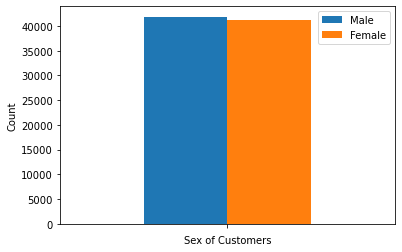

In [23]:
#Make into graphs (Sex)
import matplotlib.pyplot as plt
#Make New Dataframe with number of males and females
Sex_of_Customers_2= {'Sex of Customers': [''], 'Male': [count_males],"Female":[count_females]}
Sex_df_2 = pd.DataFrame(Sex_of_Customers_2).set_index('Sex of Customers')
Sex_df_2.plot(kind='bar',ylabel='Count')

<AxesSubplot:xlabel='Generation', ylabel='Count'>

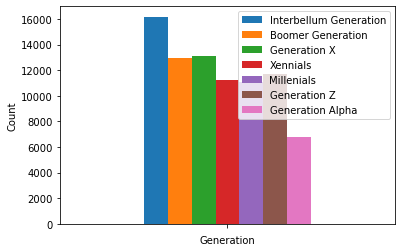

In [24]:
#Make into graphs (Generation)
#Make New Dataframe with number of males and females
Generation_2= {'Generation': [''], 'Interbellum Generation':[Interbellum_Generation],'Boomer Generation':[Boomer_Generation],'Generation X': [Generation_X],'Xennials': [Xennials],'Millenials': [Millenials],'Generation Z': [Generation_Z],'Generation Alpha': [Generation_Alpha]}
Generation_df_2 = pd.DataFrame(Generation_2).set_index('Generation')
Generation_df_2.plot(kind='bar',ylabel='Count')

<AxesSubplot:xlabel='Month', ylabel='Count'>

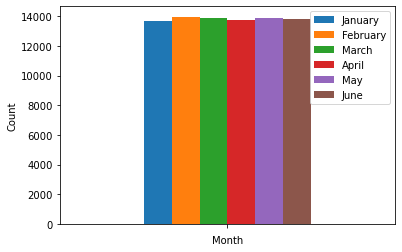

In [25]:
#Make into graphs (Number of Transactions)
Months_final= {'Month': [''],'January':[month_1_count],'February':[month_2_count],'March': [month_3_count],'April': [month_4_count],'May': [month_5_count],'June': [month_6_count]}
Months_df_final = pd.DataFrame(Months_final).set_index('Month')
Months_df_final.plot(kind='bar',ylabel='Count')